Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read Data

In [3]:
file = pd.ExcelFile("../data/v1/Handballprojekt_3Liga_21.11.2022.xlsx")

file.sheet_names

df = file.parse('3. Liga')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:422, :-2]


Cleanup & Renaming

In [4]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
#df.dropna(inplace=True)
df.replace('-', np.nan,inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','playTime',
              'homeGoals','opponentGoals','whistleThrowTime','goalKeeperPosition',
              'throwSuccess','LRHandy','throwDirection','pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','playTime':'float16',
              'homeGoals':'float16','opponentGoals':'float16','whistleThrowTime':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16' })
df.head()

,homeTeam,opponentTeam,day,name,playTime,homeGoals,opponentGoals,whistleThrowTime,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,TuS Ferndorf,VTV Mundenheim,1.0,Mundus,3.0,0.0,1.0,NaN,NaN,2.0,2.0,7.0,0.0,1.0,NaN,NaN
1,TuS Ferndorf,VTV Mundenheim,1.0,Mundus,17.0,10.0,5.0,NaN,NaN,1.0,2.0,1.0,0.0,2.0,7.0,2.0
2,TuS Ferndorf,VTV Mundenheim,1.0,Schneider,8.0,4.0,1.0,NaN,NaN,1.0,1.0,9.0,0.0,1.0,NaN,NaN
3,TuS Ferndorf,VTV Mundenheim,1.0,Schneider,11.0,7.0,3.0,NaN,NaN,1.0,1.0,3.0,0.0,2.0,9.0,1.0
4,TuS Ferndorf,VTV Mundenheim,1.0,Schneider,13.0,8.0,4.0,NaN,NaN,0.0,1.0,9.0,1.0,3.0,3.0,1.0


Teamwise Throw stats

In [5]:
# Teamwise Throw stats
df2 = df.groupby(['homeTeam'])['homeTeam'].count().reset_index(name='TotatlThrows')
df3 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df3 = df3.groupby(['homeTeam'])['homeTeam'].count().reset_index(name="SuccessfulThrows")
df4 = df.loc[(df.throwSuccess == 0)]
df4 = df4.groupby(['homeTeam'])['homeTeam'].count().reset_index(name="FailedThrows")
df5 = pd.merge(df2,df3,on='homeTeam')
df5 = pd.merge(df5,df4,on='homeTeam')
df5['successPercentage'] = (df5['SuccessfulThrows']/df5['TotatlThrows'])*100
df5.sort_values('successPercentage',ascending=False)

,homeTeam,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
0,DJK Waldbüttelbrunn,21,18,3,85.714286
3,HSG Hanau,22,18,4,81.818182
10,TuS Ferndorf,42,34,8,80.952381
11,TuS KL-Dansenberg,32,25,7,78.125000
7,TSG Haßloch,39,30,9,76.923077
6,Hochdorf II,34,26,8,76.470588
2,HSG Dutenhofen-Münchholzhausen,28,21,7,75.000000
1,HG Saarlouis,27,20,7,74.074074
8,TV Gelnhausen,25,18,7,72.000000
12,VTV Mundenheim,41,29,12,70.731707


Team & player wise Throw stats

In [6]:
# Team & player wise Throw stats
df6 = df.groupby(['homeTeam','name'])['name'].count().reset_index(name='TotatlThrows')
df7 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df7 = df7.groupby(['homeTeam','name'])['name'].count().reset_index(name="SuccessfulThrows")
df8 = df.loc[(df.throwSuccess == 0)]
df8 = df8.groupby(['homeTeam','name'])['name'].count().reset_index(name="FailedThrows")
df9 = df6.merge(df7,left_on=['homeTeam','name'],right_on=['homeTeam','name'],  how='left')
df9 = df9.merge(df8,left_on=['homeTeam','name'],right_on=['homeTeam','name'],  how='left')
df9.replace(np.nan, 0.0, inplace=True)
#df9.drop(columns=['homeTeam_x','homeTeam_y'])
df9['successPercentage'] = (df9['SuccessfulThrows']/df9['TotatlThrows'])*100
df9.sort_values('name',ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df9.sort_values('name',ascending=False))

,homeTeam,name,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
91,TuS Ferndorf,Treiber,4,2.0,2.0,50.000000
81,TV Kirchzell,Treiber,2,1.0,1.0,50.000000
110,VTV Mundenheim,Treiber,7,4.0,3.0,57.142857
99,TuS KL-Dansenberg,Steinführer,3,3.0,0.0,100.000000
32,HSG Pohlheim,Steinführer,2,2.0,0.0,100.000000
66,TSG Haßloch,Spieß,4,2.0,2.0,50.000000
80,TV Kirchzell,Spieß,6,4.0,2.0,66.666667
42,HSG Rodgau Nieder-Roden,Serwinski,4,2.0,2.0,50.000000
65,TSG Haßloch,Serwinski,3,3.0,0.0,100.000000
31,HSG Pohlheim,Serwinski,2,1.0,1.0,50.000000


Player wise Throw stats

,name,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
23,Schroven,16,15,1,93.750000
15,Mocken,18,16,2,88.888889
9,Hannes,20,17,3,85.000000
21,Schmellbacher,6,5,1,83.333333
20,Schleidweiler,6,5,1,83.333333
14,Malolepszy,26,21,5,80.769231
0,Bergold,29,23,6,79.310345
4,Dorra,9,7,2,77.777778
13,Kwiatowski,26,20,6,76.923077
1,Bremond,30,23,7,76.666667


<AxesSubplot: title={'center': 'Player stats'}, xlabel='Total Throws', ylabel='Player'>

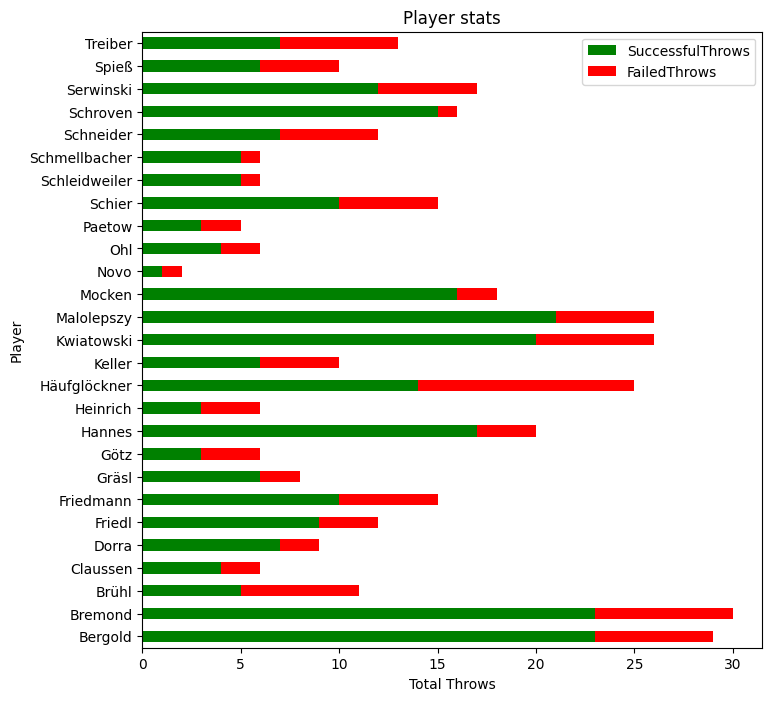

In [7]:
# Player wise Throw stats
df10 = df.groupby(['name'])['name'].count().reset_index(name='TotatlThrows')
df11 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df11 = df11.groupby(['name'])['name'].count().reset_index(name="SuccessfulThrows")
df12 = df.loc[(df.throwSuccess == 0)]
df12 = df12.groupby(['name'])['name'].count().reset_index(name="FailedThrows")
df13 = pd.merge(df10,df11,on=['name'])
df13 = pd.merge(df13,df12,on=['name'])
df13.replace(np.nan, 0.0, inplace=True)
#df9.drop(columns=['homeTeam_x','homeTeam_y'])
df13['successPercentage'] = (df13['SuccessfulThrows']/df13['TotatlThrows'])*100
df13.sort_values('name',ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df13.sort_values('successPercentage',ascending=False))
    
df13.set_index('name')[['SuccessfulThrows','FailedThrows']].plot.barh(stacked=True, title='Player stats',color=("green", "red"),xlabel='Total Throws', ylabel='Player',figsize=(8,8) )

Throw Success based on lastTrow Success

In [8]:
df14 = df.loc[:,('throwSuccess','lastThrowSuccess')]
df14.dropna(inplace=True)
df14.replace(to_replace=2.0, value=1.0, inplace=True)
print(df14.count()[0])
bothSuccess = df14[(df14.throwSuccess == 1) & (df14.lastThrowSuccess == 1)].count()[0]
print('bothSuccess: '+ str(bothSuccess))
bothFailed = df14[(df14.throwSuccess == 0) & (df14.lastThrowSuccess == 0)].count()[0]
print('bothFailed: '+ str(bothFailed))
failedButLastSuccess = df14[(df14.throwSuccess == 0) & (df14.lastThrowSuccess == 1)].count()[0]
print('failedButLastSuccess: '+ str(failedButLastSuccess))    
successButLastFailed = df14[(df14.throwSuccess == 1) & (df14.lastThrowSuccess == 0)].count()[0] 
print('successButLastFailed: '+ str(successButLastFailed)) 

print('------------------------------')
df15 = df.loc[:,('throwSuccess','lastThrowSuccess')]
df15.dropna(inplace=True)
bothNachwurf = df15[(df15.throwSuccess == 2) & (df15.lastThrowSuccess == 2)].count()[0]
print('bothNachwurf: '+ str(bothNachwurf))
successLastNachwurf = df15[(df15.throwSuccess == 1) & (df15.lastThrowSuccess == 2)].count()[0]
print('successLastNachwurf: '+ str(successLastNachwurf))
failedLastNachwurf = df15[(df15.throwSuccess == 0) & (df15.lastThrowSuccess == 2)].count()[0]
print('failedLastNachwurf: '+ str(failedLastNachwurf))

259
bothSuccess: 174
bothFailed: 7
failedButLastSuccess: 58
successButLastFailed: 20
------------------------------
bothNachwurf: 0
successLastNachwurf: 5
failedLastNachwurf: 0


Throw analysis fo L-R players

In [9]:
df15 = df.loc[:,('throwSuccess','LRHandy')]
df15.dropna(inplace=True)
df15['throwSuccess'].replace(to_replace=2.0, value=1.0, inplace=True)
noOfThrowsFromR = df15[ (df15.LRHandy == 1)].count()[0]
print('noOfThrowsFromR: '+ str(noOfThrowsFromR))
noOfThrowsFromL = df15[ (df15.LRHandy == 2)].count()[0]
print('noOfThrowsFromL: '+ str(noOfThrowsFromL)),

print('------------------')

successR = df15[(df15.throwSuccess == 1) & (df15.LRHandy == 1)].count()[0]
print('successR: '+ str(successR))

successL = df15[(df15.throwSuccess == 1) & (df15.LRHandy == 2)].count()[0]
print('successL: '+ str(successL))

failedR = df15[(df15.throwSuccess == 0) & (df15.LRHandy == 1)].count()[0]
print('failedR: '+ str(failedR))

failedL = df15[(df15.throwSuccess == 0) & (df15.LRHandy == 2)].count()[0]
print('failedL: '+ str(failedL))


print('----------------------')
print('%successR: '+ str((successR/noOfThrowsFromR)*100))
print('%successL: '+ str((successL/noOfThrowsFromL)*100))

noOfThrowsFromR: 303
noOfThrowsFromL: 115
------------------
successR: 211
successL: 96
failedR: 92
failedL: 19
----------------------
%successR: 69.63696369636963
%successL: 83.47826086956522


Throw Analysis based on pressure situation

In [43]:
df16 = df.loc[:,('pressureSituation','throwSuccess')]
df16.dropna(inplace=True)
df16 = df16.groupby(['pressureSituation','throwSuccess'])['throwSuccess'].count().reset_index(name='Count')
df16

X = ['No Pressure Situation','GoalKeeperChange','LastThrowFailed',
     'GoalDiffLessEqualTo4After50MinPlay','GoalKeeperChange-LastThrowFailed',
     'GoalKeeperChange-GoalDiffLessEqualTo4After50MinPlay','LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'GoalKeeperChange-LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'FirstInNachWurf']

for val in df16['pressureSituation']:
     df16['pressureSituation'].replace(val,X[int(val)], inplace=True)

df16['throwSuccess'].replace(0,'Fail', inplace=True)
df16['throwSuccess'].replace(1,'Success', inplace=True)
df16['throwSuccess'].replace(2,'Nachwurf', inplace=True)

df16

,pressureSituation,throwSuccess,Count
0,No Pressure Situation,Fail,80
1,No Pressure Situation,Success,218
2,No Pressure Situation,Nachwurf,5
3,GoalKeeperChange,Fail,13
4,GoalKeeperChange,Success,35
5,LastThrowFailed,Fail,6
6,LastThrowFailed,Success,11
7,LastThrowFailed,Nachwurf,1
8,GoalDiffLessEqualTo4After50MinPlay,Fail,6
9,GoalDiffLessEqualTo4After50MinPlay,Success,29


Throw Direction

,throwDirection,throwSuccess,Count
17,9.0,1.0,94
13,7.0,1.0,69
5,3.0,1.0,38
1,1.0,1.0,28
11,6.0,1.0,19
15,8.0,1.0,19
7,4.0,1.0,14
3,2.0,1.0,12
9,5.0,1.0,4
12,7.0,0.0,22


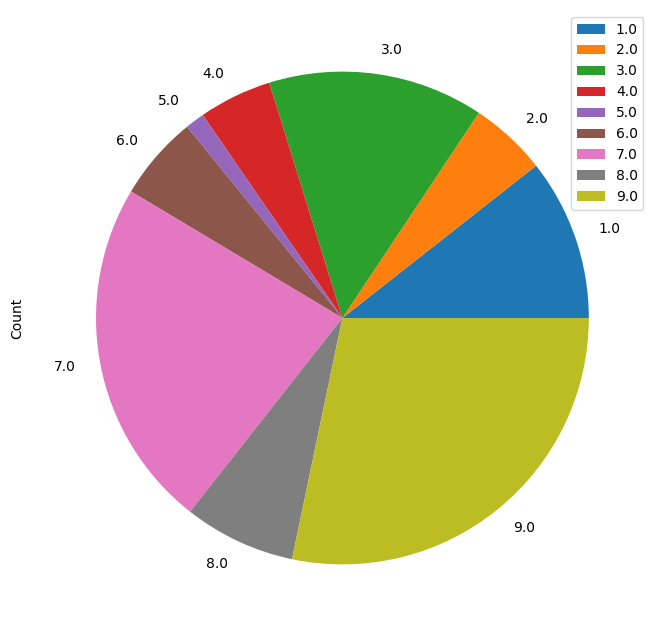

In [59]:
df17 = df.loc[:,('throwDirection','throwSuccess')]
df17.dropna(inplace=True)
df17['throwSuccess'].replace(to_replace=2.0, value=1.0, inplace=True)
df18 = df17.copy()
df18 = df18.groupby(['throwDirection'])['throwSuccess'].count().reset_index(name='Count')
df18.set_index('throwDirection').plot.pie(y='Count', figsize=(8, 8))
df17 = df17.groupby(['throwDirection','throwSuccess'])['throwSuccess'].count().reset_index(name='Count')
df17.sort_values(['throwSuccess','Count'],ascending=False,inplace=True)
df17